<a href="https://colab.research.google.com/github/thofes/SJ_distance/blob/main/Vorselektion_Flugkurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connect GDrive
from google.colab import drive
drive.mount('/content.gdrive')

Mounted at /content.gdrive


In [4]:
import json
import numpy as np
with open('/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/Results/29/confthres0.8/list.json', "r") as fp:
        data = json.load(fp)
      
conf = np.array(data["conf"])
index = np.array(data["index"])
cls = np.array(data["cls"])
x_center = np.array(data["x"])
y_center = np.array(data["y"])

In [13]:
print(x_center)
print(y_center)

points = list(zip(x_center[0:37], y_center[0:37]))
print(points)

[1020.65625429 1002.93751717  985.78127146  958.49998713  927.28126287
  897.18752146  867.65627146  841.49996996  782.43746996  756.56247854
  728.43752146  698.90627146  672.46872425  644.06252146  615.09376287
  587.24998713  557.15624571  536.06249571  508.78124356  484.59375858
  453.93749356  432.28125215  405.          378.56248498  352.12500215
  327.65623927  298.12498927  278.99999142  246.37500644  225.56250215
  199.12500322  176.90625429  149.06249464  119.81249839   97.31250376
   74.53124732   57.93750107   49.21875134  408.37501287  384.74998713
  361.68748498  342.28124142  316.12500429  293.06250215  266.34375751
  241.03125751  216.56249464  191.24999464  117.56250054 1011.37501717
  968.62502575  926.71877146  901.68751717  877.5         853.59372854
  808.03128004  783.56251717  761.90627575  735.74997425  708.18750858
  685.12497425  658.40624571  633.09374571  606.37501717  579.93746996
  549.84372854  521.99998498  466.59374356  215.43749571  145.12500644]
[1026

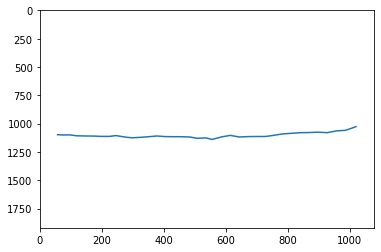

In [20]:
plt.plot(x_center[0:37], y_center[0:37])
plt.xlim(0, 1080) # set x-axis limits to (0, 1080)
plt.ylim(0, 1920) # set y-axis limits to (0, 1920)
plt.gca().invert_yaxis()
plt.show()

In [21]:
from typing import List, Tuple

def lagrange_interpolation(points: List[Tuple[float, float]]) -> "function":
    x_coords, y_coords = zip(*points)
    def interpolation_function(x):
        total = 0
        n = len(points)
        for i in range(n):
            x_i, y_i = points[i]
            def l(i, n, x_coords):
                numerator = 1
                denominator = 1
                for j in range(n):
                    if i == j:
                        continue
                    x_j = x_coords[j]
                    numerator *= (x - x_j)
                    denominator *= (x_i - x_j)
                return numerator / denominator
            total += y_i * l(i, n, x_coords)
        return total
    return interpolation_function


points = list(zip(x_center[0:37], y_center[0:37]))
interpolation_function = lagrange_interpolation(points)


In [23]:
x = 1020
y = interpolation_function(x)
print(y)
print(interpolation_function)

-149439984.45908293
<function lagrange_interpolation.<locals>.interpolation_function at 0x7fec1e9699d0>


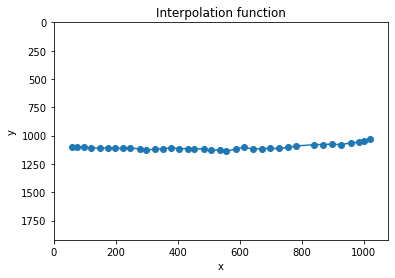

In [25]:
import matplotlib.pyplot as plt

#points = [(1,2), (3,4), (5,6), (7,8)]
#interpolation_function = lagrange_interpolation(points)

x_values = [i for i in x_center[0:37]]
y_values = [interpolation_function(x) for x in x_center[0:37]]

plt.plot(x_values, y_values)
plt.scatter(*zip(*points))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 1080) # set x-axis limits to (0, 1080)
plt.ylim(0, 1920) # set y-axis limits to (0, 1920)
plt.title('Interpolation function')

ax = plt.gca()
ax.invert_yaxis()

plt.show()


In [28]:
import numpy as np
derivative = np.gradient(y_values)
derivates = []
for i in range(len(x_values)):
        print(abs(derivative[i]))
        derivates.append(abs(derivative[i])) # threshold is value you set, to define how big the change should be
        x_change = x_values[i]
        y_change = y_values[i]
        #print("Change point at x: {}, y: {}".format(x_change, y_change))
print(derivates)

17.77782440185547
16.444473266601562
9.777774810791016
10.222206115722656
5.777778625488281
0.4444313049316406
2.2222137451171875
6.222209930419922
11.555557250976562
11.111125946044922
5.333347320556641
0.4444313049316406
2.2222137451171875
5.333347320556641
0.4444313049316406
17.777767181396484
4.444427490234375
4.888858795166016
3.9999961853027344
7.1111297607421875
1.3333511352539062
0.4444313049316406
3.1110763549804688
0.4444313049316406
5.777778625488281
4.888916015625
0.444488525390625
9.777774810791016
3.5555648803710938
3.5555076599121094
1.3332939147949219
1.7777252197265625
1.3333511352539062
4.888916015625
3.5555648803710938
0.8888626098632812
2.6665878295898438
[17.77782440185547, 16.444473266601562, 9.777774810791016, 10.222206115722656, 5.777778625488281, 0.4444313049316406, 2.2222137451171875, 6.222209930419922, 11.555557250976562, 11.111125946044922, 5.333347320556641, 0.4444313049316406, 2.2222137451171875, 5.333347320556641, 0.4444313049316406, 17.777767181396484, 4

In [30]:
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
average_values = []

for i in range(len(derivates) - 5):
    window = derivates[i:i+5]
    average = sum(window) / len(window)
    average_values.append(average)

print(average_values)
print(len(average_values))


[12.000011444091797, 8.533332824707031, 5.688880920410156, 4.9777679443359375, 5.244438171386719, 6.311107635498047, 7.288890838623047, 6.9333343505859375, 6.133335113525391, 4.888893127441406, 2.75555419921875, 5.244438171386719, 6.044437408447266, 6.577766418457031, 6.31109619140625, 7.644435882568359, 4.355552673339844, 3.555553436279297, 3.1999969482421875, 2.4888839721679688, 2.2222137451171875, 2.9333267211914062, 2.933338165283203, 4.2666778564453125, 4.888904571533203, 4.444450378417969, 3.733325958251953, 3.9999732971191406, 2.3110885620117188, 2.5777587890625, 2.577770233154297, 2.4888839721679688]
32
